In [29]:
import numpy as np
import random 

def ext_euclid_algor(a, b):
    # алгоритм Евклида используется для обратного вычисления
    if b == 0:
        return a, 1, 0
    else:
        d, xx, yy = ext_euclid_algor(b, a % b)
        x = yy
        y = xx - (a // b) * yy
        return d, x, y

In [30]:
def inverse(a, n):
    #инверсия а по mod n
    return int(ext_euclid_algor(a, n)[1])

In [31]:
def step1(x, a, b, tuple):
    G, H, P, Q = tuple[0], tuple[1], tuple[2], tuple[3]

    sub = lift(x) % 3 
    if sub == 0:
        x = x*G % P
        a = (a+1) % Q

    if sub == 1:
        x = x * H % P
        b = (b + 1) % Q

    if sub == 2:
        x = x*x % P
        a = a*2 % Q
        b = b*2 % Q
    return x, a, b


In [32]:


def step2(x, a, b, tuple):
    G, H, P, Q = tuple[0], tuple[1], tuple[2], tuple[3]
    
    l = np.random.randint(1, G)
    k = np.random.randint(1, G)
    L = pow(G, l)
    K = pow(H, k)

    
    sub = lift(x) % 3 

    if sub == 0:
        x = x*L % P
        a = (a+l) % Q
        b=b

    if sub == 1:
        x = x * K % P
        b = (b + l) % Q
        a = a % Q
        
    if sub == 2:
        x = x*x % P
        a = a*2 % Q
        b = b*2 % Q
    return x, a, b


In [33]:


def step3(x, a, b, tuple):
    G, H, P, Q = tuple[0], tuple[1], tuple[2], tuple[3]
    l = []
    k = []
    i = 0
    while i<20:
        l.append(np.random.randint(1, G))
        k.append(np.random.randint(1, G))
        i+=1
        
    i = 0
    sub = lift(x) % 20 # Subsets
    
    L = pow(G, l[sub]) * pow(H, k[sub])
    x = x*L % P
    a = (a + l[sub]) % Q
    b = (b + k[sub]) % Q 
    
    
    return x, a, b


In [34]:

def step4(x, a, b, tuple):
    G, H, P, Q = tuple[0], tuple[1], tuple[2], tuple[3]
    l = []
    k = []
    i = 0
    while i<20:
        l.append(np.random.randint(1, G))
        k.append(np.random.randint(1, G))
        i+=1
    
    u1, u2, u3, u4 = random.sample(range(1, G), 4)
 
    i = 0
    sub = lift(x) % 20 # Subsets
    if sub != u1 or sub != u2 or sub != u3 or sub != u4:
        L = pow(G, l[sub]) * pow(H, k[sub])
        x = x*L % P
        a = (a + l[sub]) % Q
        b = (b + k[sub]) % Q 
    else:
        x = x * x
        a = (2 * a) % Q
        b = (2 * b) % Q
        
    
    return x, a, b


In [35]:
def pollard1(G, H, P):
    #G-генератор
    #P-простое число
    opCount = 0
    
    Q = int((P - 1) // 2)  # подгруппа
    x = G*H
    a = 1
    b = 1

    X = x
    A = a
    B = b
    
    for i in range(1, P):
        x, a, b = step1(x, a, b, (G, H, P, Q))
        opCount += 1
        X, A, B = step1(X, A, B, (G, H, P, Q))
        opCount += 1
        X, A, B = step1(X, A, B, (G, H, P, Q))
        opCount += 1

        if x == X:
            break
        
    nom = a-A
    denom = B-b
    #Необходимо вычислить обратное значение, чтобы правильно вычислить дробь по модулю q.
    res = (inverse(denom, Q) * nom) % Q

    if verify(G, H, P, res):
        return res, opCount

    return res + Q, opCount


In [36]:
def pollard2(G, H, P):
  
    opCount = 0
    
    Q = int((P - 1) // 2)
    x = G*H
    a = 1
    b = 1

    X = x
    A = a
    B = b
    
    for i in range(1, P):
    
        x, a, b = step2(x, a, b, (G, H, P, Q))
        opCount += 1
        X, A, B = step2(X, A, B, (G, H, P, Q))
        opCount += 1
        X, A, B = step2(X, A, B, (G, H, P, Q))
        opCount += 1

        if x == X:
            break
        
    nom = a-A
    denom = B-b

    res = (inverse(denom, Q) * nom) % Q

    if verify(G, H, P, res):
        return res, opCount

    return res + Q, opCount


In [37]:
def pollard3(G, H, P):

    opCount = 0
    
    Q = int((P - 1) // 2) 
    x = G*H
    a = 1
    b = 1

    X = x
    A = a
    B = b
    
    for i in range(1, P):
        x, a, b = step3(x, a, b, (G, H, P, Q))
        opCount += 1
        X, A, B = step3(X, A, B, (G, H, P, Q))
        opCount += 1
        X, A, B = step3(X, A, B, (G, H, P, Q))
        opCount += 1

        if x == X:
            break
        
    nom = a-A
    denom = B-b
    
    res = (inverse(denom, Q) * nom) % Q

    if verify(G, H, P, res):
        return res, opCount

    return res + Q, opCount


In [38]:
def pollard4(G, H, P):
    #G-генератор
    #H
    #P-простое число
    opCount = 0
    
    Q = int((P - 1) // 2)  # подгруппа
    x = G*H
    a = 1
    b = 1

    X = x
    A = a
    B = b
    
    for i in range(1, P):
        x, a, b = step4(x, a, b, (G, H, P, Q))
        opCount += 1
        X, A, B = step4(X, A, B, (G, H, P, Q))
        opCount += 1
        X, A, B = step4(X, A, B, (G, H, P, Q))
        opCount += 1

        if x == X:
            break
        
    nom = a-A
    denom = B-b

    res = (inverse(denom, Q) * nom) % Q

    if verify(G, H, P, res):
        return res, opCount

    return res + Q, opCount


In [39]:
def verify(g, h, p, x):
    #Проверяет заданный набор g, h, p и x
    return pow(g, int(x), p) == h

In [40]:
import time
jj=5
sptime = [[],[],[],[]]
spoperation = [[],[],[],[]]

while jj < 18:
    print(jj)
    M = next_prime(2 ** jj)
    A = Mod(ZZ.random_element(M), M)
    B = A ** ZZ.random_element(M - 1)

    t1 = time.time()

    res, opCount = pollard1(A, B, M)

    t2 = time.time()
    sptime[0].append((t2 - t1))
    spoperation[0].append(opCount)
    t1 = time.time()

    res, opCount = pollard2(A, B, M)

    t2 = time.time()
    sptime[1].append((t2 - t1))
    spoperation[1].append(opCount)
    t1 = time.time()

    res, opCount = pollard3(A, B, M)

    t2 = time.time()
    sptime[2].append((t2 - t1))
    spoperation[2].append(opCount)
    t1 = time.time()

    res, opCount = pollard4(A, B, M)

    t2 = time.time()
    sptime[3].append((t2 - t1))
    spoperation[3].append(opCount)
    jj+=1

print(sptime)
print('Operations invoked:', opCount)



5
6
7
8
9
10
11
12
13
14
15
16
17
[[0.00047278404235839844, 0.00013875961303710938, 0.00023603439331054688, 0.00020742416381835938, 0.000156402587890625, 0.00014591217041015625, 0.0009288787841796875, 0.0004868507385253906, 0.001817941665649414, 0.0019676685333251953, 0.004184246063232422, 0.0010733604431152344, 0.005812883377075195], [0.0018873214721679688, 0.0021872520446777344, 0.0001876354217529297, 0.0040280818939208984, 0.006245613098144531, 0.0051212310791015625, 0.10782837867736816, 0.005463600158691406, 0.5402181148529053, 0.06340742111206055, 0.03857421875, 0.03180074691772461, 8.101769924163818], [0.041144609451293945, 0.036924123764038086, 0.007257699966430664, 0.0033082962036132812, 0.1938633918762207, 0.025688886642456055, 0.20734262466430664, 0.09520745277404785, 7.331570863723755, 1.4127428531646729, 9.74161148071289, 26.005481719970703, 73.62638640403748], [0.034430742263793945, 0.027186870574951172, 0.01475834846496582, 0.07543253898620605, 0.4428105354309082, 0.10467

In [41]:
print(sptime)

[[0.00047278404235839844, 0.00013875961303710938, 0.00023603439331054688, 0.00020742416381835938, 0.000156402587890625, 0.00014591217041015625, 0.0009288787841796875, 0.0004868507385253906, 0.001817941665649414, 0.0019676685333251953, 0.004184246063232422, 0.0010733604431152344, 0.005812883377075195], [0.0018873214721679688, 0.0021872520446777344, 0.0001876354217529297, 0.0040280818939208984, 0.006245613098144531, 0.0051212310791015625, 0.10782837867736816, 0.005463600158691406, 0.5402181148529053, 0.06340742111206055, 0.03857421875, 0.03180074691772461, 8.101769924163818], [0.041144609451293945, 0.036924123764038086, 0.007257699966430664, 0.0033082962036132812, 0.1938633918762207, 0.025688886642456055, 0.20734262466430664, 0.09520745277404785, 7.331570863723755, 1.4127428531646729, 9.74161148071289, 26.005481719970703, 73.62638640403748], [0.034430742263793945, 0.027186870574951172, 0.01475834846496582, 0.07543253898620605, 0.4428105354309082, 0.10467791557312012, 1.4484870433807373, 

In [42]:
print(spoperation)

[[30, 15, 48, 48, 27, 30, 213, 111, 414, 510, 1083, 180, 1323], [33, 93, 6, 192, 252, 222, 4869, 231, 24624, 2946, 1707, 1302, 348537], [108, 129, 27, 12, 648, 96, 765, 330, 24624, 4431, 31338, 88674, 254937], [108, 93, 51, 240, 1560, 354, 5052, 231, 24624, 5454, 5160, 64143, 393300]]


In [43]:
import matplotlib.pyplot as plt

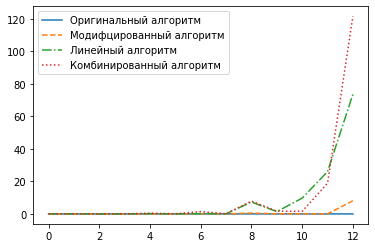

In [45]:
plt.plot(sptime[0])
plt.plot(sptime[1], "--")
plt.plot(sptime[2], "-.")
plt.plot(sptime[3], ":")
plt.legend(['Оригинальный алгоритм', 'Модифцированный алгоритм', 'Линейный алгоритм', 'Комбинированный алгоритм'])